<a href="https://colab.research.google.com/github/jaemoi/sturdy-happiness/blob/main/%EB%8D%B0%EC%9D%B4%EC%BD%98_%EB%B9%99%ED%95%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_insample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
#GPU를 사용하도록 설정
tf.debugging.set_log_device_placement(True)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
#텐서플로의 객체 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [ ]:
import numpy as np
np.random.seed(7)
from matplotlib import pyplot as plt

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', tf.keras.__version__)

Python version :  3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
TensorFlow version :  2.4.1
Keras version :  2.4.0


In [ ]:
import numpy as np

In [ ]:
이미지_높이 = 448
이미지_너비 = 304

In [ ]:
#0으로 초기화된 배열 생성
# 448 * 304 * 4
학습이미지_하나 = np.zeros((이미지_높이, 이미지_너비, 4), dtype = np.uint8) #<-- 오타 수정

In [ ]:
학습이미지_하나

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [ ]:
학습이미지_하나.shape

(448, 304, 4)

In [ ]:
import cv2

In [ ]:
#197811.
npy_file="197811.npy"

npy_data = np.load(npy_file)
#0번째 이미지를 해빙농도 변수에 저장
해빙농도 = npy_data[: , : , 0]
#1번째 이미지 북극점 변수에 저장
북극점 = npy_data[: , : , 1]

#2번째 이미지 해안선 마스크 변수에 저장
해안선마스크 = npy_data[: , : , 2]
#3번째 이미지 육지마스크에 대입
육지마스크 = npy_data[: , : , 3]
#해빙농도, 북극점, 해안선마스크, 육지마스크를 하나로 병합
학습이미지_하나 = cv2.merge((해빙농도, 북극점, 해안선마스크, 육지마스크))


In [ ]:
학습이미지_하나

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       ...,

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [ ]:
학습이미지_하나.shape

(448, 304, 4)

In [ ]:
import glob

targetPattern = "*.npy"
#현재 폴더에서 확장자가 npy인 파일 리스트 리턴
npy_file_name_list = glob.glob(targetPattern)

npy_file_name_list

['198708.npy',
 '199103.npy',
 '199610.npy',
 '201312.npy',
 '199606.npy',
 '199201.npy',
 '201011.npy',
 '200301.npy',
 '201110.npy',
 '197907.npy',
 '200111.npy',
 '198511.npy',
 '199805.npy',
 '201512.npy',
 '200910.npy',
 '199703.npy',
 '198610.npy',
 '200103.npy',
 '198002.npy',
 '199303.npy',
 '198004.npy',
 '198308.npy',
 '198701.npy',
 '199001.npy',
 '201712.npy',
 '199008.npy',
 '198507.npy',
 '198810.npy',
 '201410.npy',
 '199107.npy',
 '200709.npy',
 '200601.npy',
 '200011.npy',
 '199504.npy',
 '198811.npy',
 '198607.npy',
 '198508.npy',
 '200109.npy',
 '201603.npy',
 '200506.npy',
 '201107.npy',
 '198411.npy',
 '201303.npy',
 '198703.npy',
 '199903.npy',
 '199002.npy',
 '201511.npy',
 '200707.npy',
 '199211.npy',
 '201203.npy',
 '198111.npy',
 '200808.npy',
 '200906.npy',
 '201606.npy',
 '201504.npy',
 '197911.npy',
 '198104.npy',
 '199809.npy',
 '201308.npy',
 '201506.npy',
 '198603.npy',
 '199808.npy',
 '198101.npy',
 '200810.npy',
 '200308.npy',
 '199003.npy',
 '198901.n

In [ ]:
#확장자가 npy인 파일 리스트를 오름차순 정렬
npy_file_name_list.sort()

In [ ]:
npy_file_name_list

['197811.npy',
 '197812.npy',
 '197901.npy',
 '197902.npy',
 '197903.npy',
 '197904.npy',
 '197905.npy',
 '197906.npy',
 '197907.npy',
 '197908.npy',
 '197909.npy',
 '197910.npy',
 '197911.npy',
 '197912.npy',
 '198001.npy',
 '198002.npy',
 '198003.npy',
 '198004.npy',
 '198005.npy',
 '198006.npy',
 '198007.npy',
 '198008.npy',
 '198009.npy',
 '198010.npy',
 '198011.npy',
 '198012.npy',
 '198101.npy',
 '198102.npy',
 '198103.npy',
 '198104.npy',
 '198105.npy',
 '198106.npy',
 '198107.npy',
 '198108.npy',
 '198109.npy',
 '198110.npy',
 '198111.npy',
 '198112.npy',
 '198201.npy',
 '198202.npy',
 '198203.npy',
 '198204.npy',
 '198205.npy',
 '198206.npy',
 '198207.npy',
 '198208.npy',
 '198209.npy',
 '198210.npy',
 '198211.npy',
 '198212.npy',
 '198301.npy',
 '198302.npy',
 '198303.npy',
 '198304.npy',
 '198305.npy',
 '198306.npy',
 '198307.npy',
 '198308.npy',
 '198309.npy',
 '198310.npy',
 '198311.npy',
 '198312.npy',
 '198401.npy',
 '198402.npy',
 '198403.npy',
 '198404.npy',
 '198405.n

In [ ]:
#전체 학습 이미지가 저장될 리스트
전체_학습이미지_리스트 = []

#npy_file_name_list 에서 파일명 하나를 npy_file에 대입
for npy_file in npy_file_name_list:
  print("npy_file = ", npy_file)
  npy_data = np.load(npy_file)
  #0번째 이미지를 해빙농도 변수에 저장
  해빙농도 = npy_data[: , : , 0]
  #1번째 이미지 북극점 변수에 저장
  북극점 = npy_data[: , : , 1]
  북극점_포함_해빙농도 = 해빙농도+북극점
  #2번째 이미지 해안선 마스크 변수에 저장
  해안선마스크 = npy_data[: , : , 2]
  #3번째 이미지 육지마스크에 대입
  육지마스크 = npy_data[: , : , 3]
  학습이미지_하나 = np.zeros((이미지_높이, 이미지_너비, 4), dtype = np.uint8) #<-- 오타 수정
  #해빙농도, 북극점, 해안마스크, 육지마스크를 하나로 병합
  학습이미지_하나 = cv2.merge((해빙농도, 북극점_포함_해빙농도, 해안선마스크, 육지마스크))
  #학습이미지_하나를 전체_학습이미지_리스트에 추가
  전체_학습이미지_리스트.append(학습이미지_하나)
  print("="*100)

npy_file =  197811.npy
npy_file =  197812.npy
npy_file =  197901.npy
npy_file =  197902.npy
npy_file =  197903.npy
npy_file =  197904.npy
npy_file =  197905.npy
npy_file =  197906.npy
npy_file =  197907.npy
npy_file =  197908.npy
npy_file =  197909.npy
npy_file =  197910.npy
npy_file =  197911.npy
npy_file =  197912.npy
npy_file =  198001.npy
npy_file =  198002.npy
npy_file =  198003.npy
npy_file =  198004.npy
npy_file =  198005.npy
npy_file =  198006.npy
npy_file =  198007.npy
npy_file =  198008.npy
npy_file =  198009.npy
npy_file =  198010.npy
npy_file =  198011.npy
npy_file =  198012.npy
npy_file =  198101.npy
npy_file =  198102.npy
npy_file =  198103.npy
npy_file =  198104.npy
npy_file =  198105.npy
npy_file =  198106.npy
npy_file =  198107.npy
npy_file =  198108.npy
npy_file =  198109.npy
npy_file =  198110.npy
npy_file =  198111.npy
npy_file =  198112.npy
npy_file =  198201.npy
npy_file =  198202.npy
npy_file =  198203.npy
npy_file =  198204.npy
npy_file =  198205.npy
npy_file = 

In [ ]:
전체_학습이미지_리스트

[array([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],
 
        ...,
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
 
        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]], dtype=uint8), array([[[0, 0, 0, 0],
         [0, 0, 0, 0

In [ ]:
#전체_학습이미지_리스트를 배열로 변환
전체_학습이미지_배열 = np.array ( 전체_학습이미지_리스트)

In [ ]:
전체_학습이미지_배열

array([[[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],

        [[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         ...,
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1]],

        ...,

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[0, 0, 0, 1],
         [0, 0, 0, 1],
         [0, 0, 0, 1],
         ...,
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]]],


       [[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0

In [ ]:
전체_학습이미지_배열.shape

(482, 448, 304, 4)

In [ ]:
X_train_list = []
y_train_list = []
#첫번째 이미지부터 마지막 24개의 이미지(2016년 1월 ~ 2018년 12월)를 제외한 이미지 
for i in range(482-24):
  #i번째 이미지 1개(북극점포함_해빙농도, 해안마스크, 육지마스크를 하나로 병합 ) 를 X_train_list에 추가
  X_train_list.append( 전체_학습이미지_배열[i, : , : , 1:] )
  #i+12 번째 이미지  (1년후) 의 0번째 데이터 (해빙농도)를 y_train_list에 추가
  y_train_list.append( 전체_학습이미지_배열[i+12, : , : , 0] )

In [ ]:
#X_train_list (북극점포함_해빙농도, 해안마스크, 육지마스크) 을 배열로 변환
X_train = np.array(X_train_list)
#y_train_list (해빙농도) 를 배열로 변환
y_train = np.array(y_train_list)

In [ ]:
#X_train의 모양 조회
# 448줄 304칸 짜리 3개 이미지 조합이 458개
X_train.shape

(458, 448, 304, 3)

In [ ]:
#y_train 모양 조회
#448줄 304칸 의 배열 (해빙농도) 가 458개
y_train.shape

(458, 448, 304)

In [ ]:
#y_train.reshape(-1, 448*304 ) : 448줄 304칸의 데이터를 1줄 448*304 칸으로 변환 
y_train = y_train.reshape(-1, 448*304 )

In [ ]:
y_train.shape

(458, 136192)

In [ ]:
X_test_list = []
y_test_list = []
#전체 학습이미지 482개중 
#482-24 (2017년 1월) 부터 482-12 (2017년 12월) 까지 반복
for i in range(482-24,482-12):
  #i번째 이미지 1개(북극점포함_해빙농도, 해안마스크, 육지마스크를 하나로 병합 ) 를 X_test_list에 추가
  X_test_list.append( 전체_학습이미지_배열[i, : , : , 1:] )
  #i+12 번째 이미지 (해빙농도) 를 y_test_list에 추가
  y_test_list.append( 전체_학습이미지_배열[i+12, : , : , 0] )


In [ ]:
#X_test_list를 배열로 변환
X_test = np.array(X_test_list)

In [ ]:
#X_test의 모양 조회
#448줄 304칸 이미지 3개 조합(북극점 포함 해빙농도, 해안마스크,육지마스크)이 12개
X_test.shape

(12, 448, 304, 3)

In [ ]:
#y_test_list를 배열로 변환
y_test = np.array(y_test_list)

In [ ]:
#y_test 의 모양 조회
#448줄 304칸 이미지 (해빈농도) 12개
y_test.shape

(12, 448, 304)

In [ ]:
#y_test.reshape(-1, 448*304) : 448칸 304줄의 데이터를 1칸 448*304칸으로 수정
y_test = y_test.reshape(-1, 448*304)

In [ ]:
y_test.shape

(12, 136192)

In [ ]:
#한번에 이미지 2개씩 학습
#한번에 많은 이미지씩 학습하면 학습속도도 빠르고 정확도도 높으나 메모리가 많이 필요함

batch_size = 2
#결과 칸수
num_classes = 448*304
#학습데이터에 저장된 458개 이미지를 300번 반복해서 학습
epochs = 300

In [ ]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(5, 5), strides=(5, 5), padding='same',
                 activation='relu',
                 input_shape=(이미지_높이, 이미지_너비, 3)))

model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5)))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='relu'))

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 90, 61, 256)       19456     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 12, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 12, 256)       1638656   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 2, 256)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 2, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

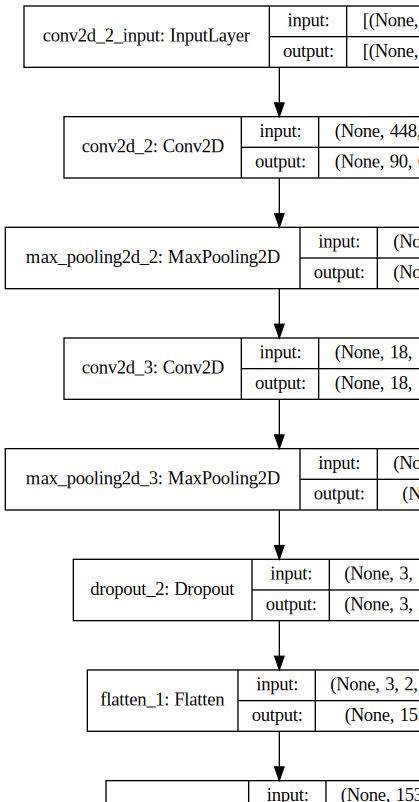

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#Mean Squared Error 를 계산해서 오차가최소화 되는 모델을 만들꺼임
model.compile(loss='mean_squared_error', 
              optimizer=Adam(lr=1e-4), 
              metrics=[tf.keras.metrics.MeanSquaredError()]
              )


Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhos

In [ ]:
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 shuffle=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Executing op __inference_train_function_140227 in device /job:localhost/replica:0/task:0/device:GPU:0
167/229 [====================>.........] - ETA: 1s - loss: 247.4604 - mean_squared_error: 247.4604Executing op __inference_train_function_140227 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_140227 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_140227 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_140227 in device /job:localhost/replica:0/task:0/device:GPU:0
171/229 [=====================>........] - ETA: 0s - loss: 247.2310 - mean_squared_error: 247.2310Executing op __inference_train_function_140227 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_140227 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_140227 in devi

In [ ]:
#X_test : 2017년 1월~12월 북극점포함해빙농도,해안마스크, 육지마스크

#model.predic () : 1년후 해빙농도를 예측함
#=>2017년 1월의 북극점포함해빙농도,해안마스크,육지마스크 입력하면
#2018년 1월의 해빙농도 예측

#X_test에 2017년 1월~12월 북극점포함해빙농도,해안마스크, 육지마스크 가 저장되 있으므로
#model.predict()는 2018년 1월~12월 해빙농도를 예측해서 y_predict에 저장
y_predict = model.predict(X_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Ide

In [ ]:
#2018년 1월~12월 해빙농도
y_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
#2018년 1월 진짜 해빙농도
y_test[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
#1줄 448*304칸의 2018년 1월 예측 해빙이미지(y_predict[0])를 448줄 304칸으로 변환해서
#예측0_이미지에 대입
예측0_이미지 = y_predict[0].reshape(448, 304)

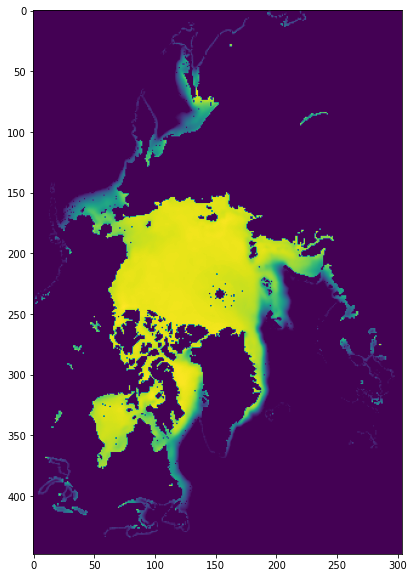

In [ ]:
#2018년 1월 예측한 해빙농도 출력
plt.figure(figsize=(15,10))

plt.imshow(예측0_이미지)

In [ ]:
#1줄 448*304칸 2018년 1월 진짜 해빙이미지 (y_test[0]) 를 448줄 304칸으로
#변환해서 진짜0_이미지 에 저장
진짜0_이미지 = y_test[0].reshape(448, 304)

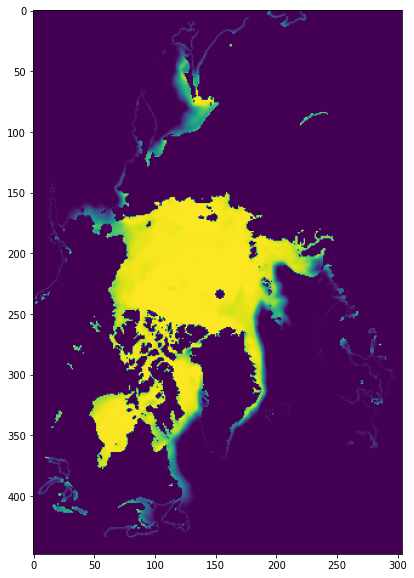

In [ ]:
#2018년 1월 진짜 해빙농도 출력
plt.figure(figsize=(15,10))

plt.imshow(진짜0_이미지)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#Mean Squared Error
mean_squared_error(y_test, y_predict)

249.73041

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#Mean Absolute Error
mean_absolute_error(y_test, y_predict)

3.9212494